# Analyze unit info df

## TODO

## Setup

### Start DJD
Run main.py as interactive (-i) module (-m) and remotely (-r)\
NOTE: any code inside the DJD-executing cell other than the executing line is not allowed

In [1]:
run -im djd.main -- --dbname=dj_hmov --user=write

Connecting write@huxley.neuro.bzm:3306
Connected to database 'dj_hmov' as 'write@10.153.173.165'


In [2]:
import matplotlib.pyplot as plt

from djd import hmov_models
from djd import hmov_unit
from l6s import l6s_utils # Layer 6 suppression code repo with utility functions for plotting unit overview

# This import does not seem to work - WHY? works for other DJD modules and functions - circular import?
# from djd.hmov_unit import get_tranges_hmov, _get_xptranges  

Importing l6s package.


In [3]:
%load_ext autoreload
%autoreload 2

## Get unit info df

In [4]:
# Get unit info df
unit_info = l6s_utils.get_combined_unit_info(load_df_name='unit_info_20201214')
unit_info

get_combined_unit_info(): Getting combined unit info.
  Loading previous mseu df file:
   /Users/ybauer/GDrive/BBE_BusseBerensEuler/projects/ct-fb_L6_suppression/analyses/L6_suppression/l6s/unit_crit_and_type_info/data/unit_info_20201214.csv


,m,s,e,u,s_region,e_name,tun_model,tun_rsq_ctrl,tun_rsq_opto,c_zscore,...,OSI_opto,DSI_ctrl,DSI_opto,sbc_zscore,sbc_method,sbc,chirp_type,wave_type,burst_ratio_ctrl,burst_ratio_opto
0,Ntsr1Cre_2019_0007,4,1,13,LGN,AsparseNoise5_60deg,ellipse,0.105440,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,excit,NaN,NaN
1,Ntsr1Cre_2019_0007,4,1,20,LGN,AsparseNoise5_60deg,ellipse,0.109845,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,excit,NaN,NaN
2,Ntsr1Cre_2019_0007,4,1,27,LGN,AsparseNoise5_60deg,ellipse,0.092832,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,excit,NaN,NaN
3,Ntsr1Cre_2019_0007,4,1,47,LGN,AsparseNoise5_60deg,ellipse,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,excit,NaN,NaN
4,Ntsr1Cre_2019_0007,4,1,51,LGN,AsparseNoise5_60deg,ellipse,0.105103,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,excit,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1728,Ntsr1Cre_2020_0002,6,10,28,LGN,MAS_1400_200-500_ChR2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,excit,NaN,NaN
1729,Ntsr1Cre_2020_0002,6,10,30,LGN,MAS_1400_200-500_ChR2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,excit,NaN,NaN
1730,Ntsr1Cre_2020_0002,6,10,33,LGN,MAS_1400_200-500_ChR2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,excit,NaN,NaN
1731,Ntsr1Cre_2020_0002,6,10,38,LGN,MAS_1400_200-500_ChR2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,excit,NaN,NaN


In [5]:
unit_info.keys()

Index(['m', 's', 'e', 'u', 's_region', 'e_name', 'tun_model', 'tun_rsq_ctrl', 'tun_rsq_opto', 'c_zscore', 'fr_mean', 'fr_mean_sem', 'fr_ctrl', 'fr_ctrl_sem', 'fr_opto', 'fr_opto_sem', 'fr_spon_ctrl',
       'fr_spon_ctrl_sem', 'fr_spon_opto', 'fr_spon_opto_sem', 'OMI', 'SNR_opto', 'SNR_ctrl', 'OSI_ctrl', 'OSI_opto', 'DSI_ctrl', 'DSI_opto', 'sbc_zscore', 'sbc_method', 'sbc', 'chirp_type',
       'wave_type', 'burst_ratio_ctrl', 'burst_ratio_opto'],
      dtype='object')

## Check OMIs
NOTES
 - df has a lot of variants of MAS-mov
   - these show strong suppression
TODO
 - sparse noise exps seem to have OMIs, which should not be possible < fix!
 - extreme OMIs of 1 or -1 likely due to FR=0 in one condition < fix!
 - limit valid stimuli to ori/Aori, con, ...

In [9]:
unit_info['OMI']

0      -0.070194
1       0.054746
2      -0.157964
3       0.102499
4      -0.008402
          ...   
1728    0.009546
1729   -0.004419
1730   -0.020728
1731   -0.031318
1732   -0.012021
Name: OMI, Length: 1733, dtype: float64

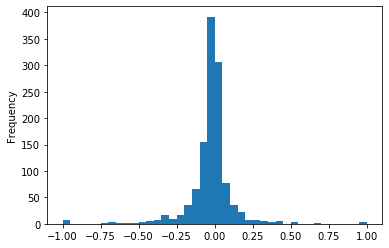

In [16]:
# Show all
unit_info['OMI'].plot.hist(bins=40)

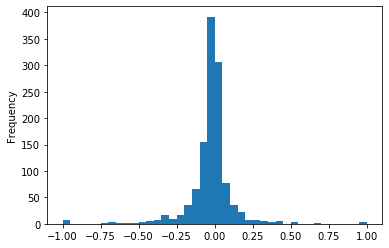

In [20]:
# Group by experiemnt
unit_info['OMI'].plot.hist(bins=40, by=unit_info['e_name'])  # does not work

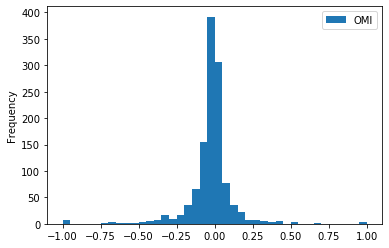

In [6]:
df = unit_info[unit_info['OMI'].notna()][['e_name', 'OMI']]
df.plot.hist(bins=40, by=df['e_name']);  # identical to one above (< nans dropped automatically)

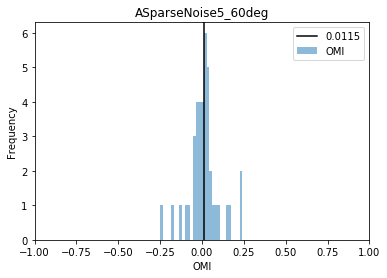

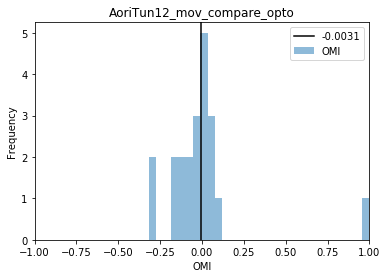

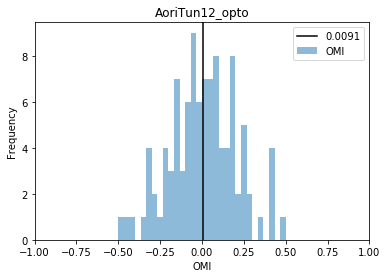

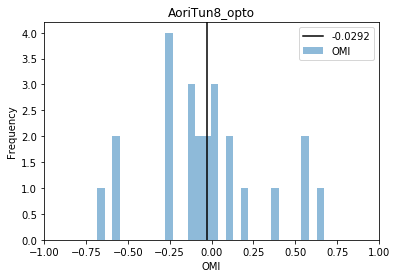

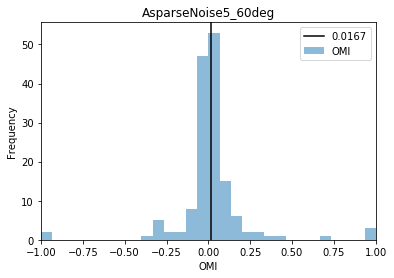

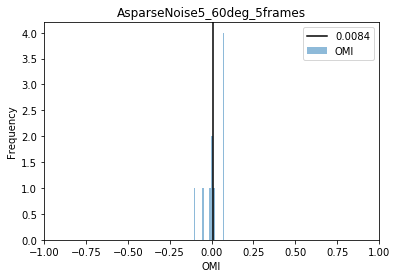

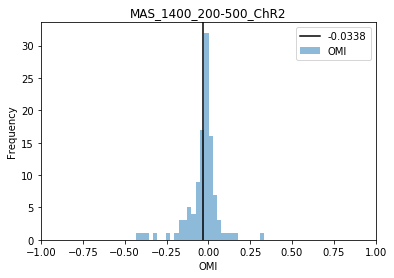

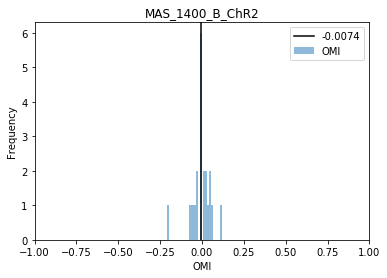

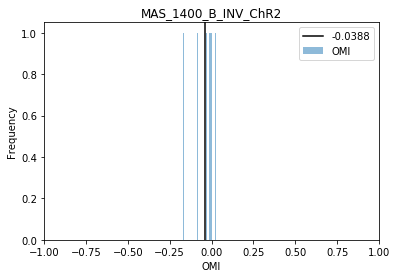

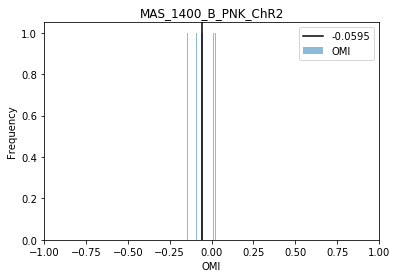

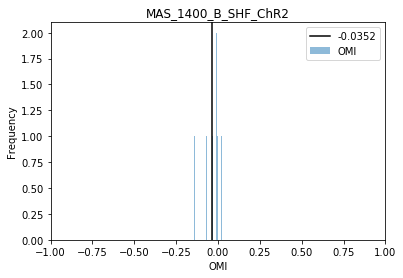

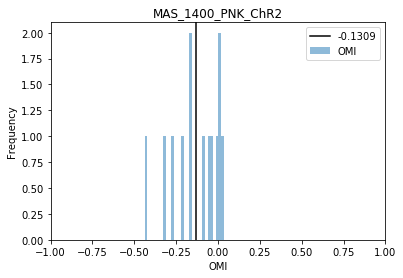

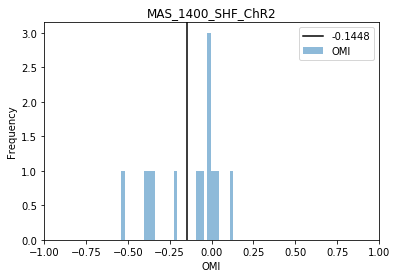

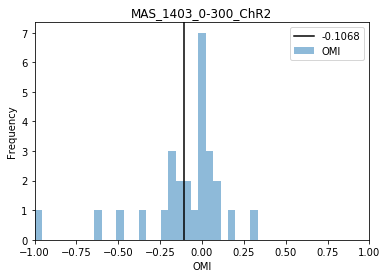

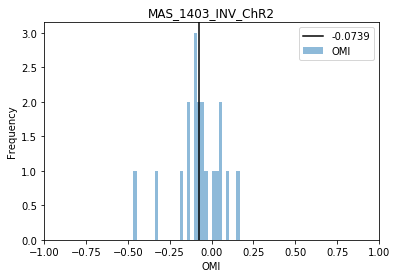

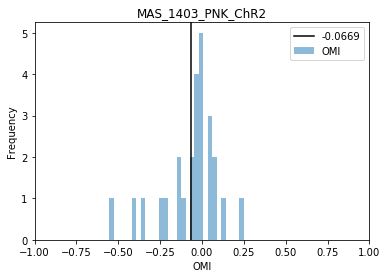

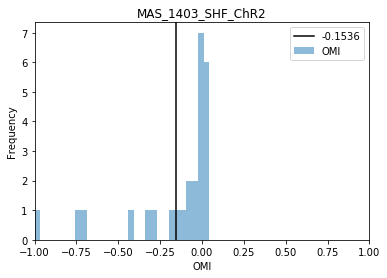

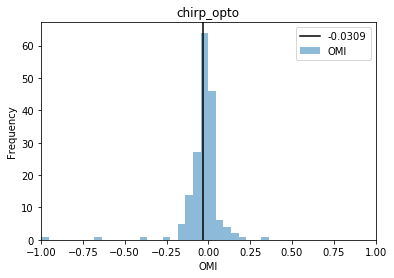

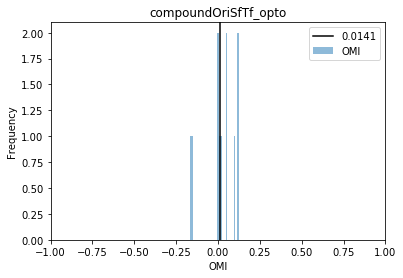

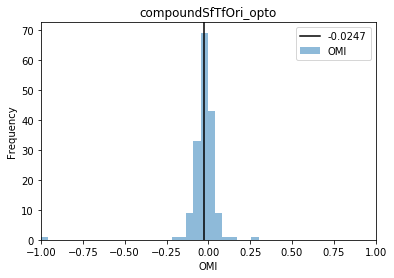

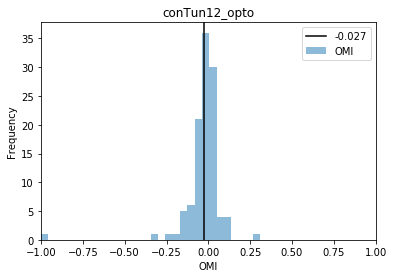

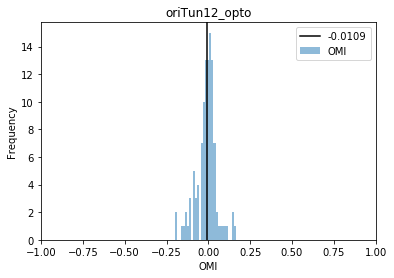

In [24]:
for i, group in df.groupby('e_name'):
#     ax = group['OMI'].plot.hist(bins=30, label=i, alpha=0.5)
    ax = group['OMI'].plot.hist(bins=30, alpha=0.5)
    ax.set_title(i)
    ax.set_xlabel('OMI')
    ax.set_xlim([-1, 1])
    
    mean = group['OMI'].mean()
    ax.axvline(mean, color='k', label=np.round(mean, 4))
    ax.legend()
    plt.show()

Next steps:
- OMI: limit valid stimuli to ori/Aori, con, ...
- try burst scatter for different stimuli (no group by given, so need to call several times into same axis for diff stimuli)